# Reading XRF data

In [60]:
from XRDXRFutils import DataXRF,resample

from numpy import arange,linspace
from matplotlib.pyplot import plot,subplots,xlim,ylim,hlines,vlines,xlabel,ylabel,imshow,legend,vlines,savefig

from scipy.interpolate import interp1d
from numpy import concatenate,append,array,diff,trapz

from multiprocessing import Pool

In [2]:
from scipy.stats import poisson

In [3]:
data = DataXRF()

In [4]:
path = '/home/zdenek/storage/dataXRDXRF/Giulia_XRF/'
data.calibrate_from_file('/home/zdenek/storage/dataXRDXRF/Giulia_XRF/calibration.ini')

In [5]:
data.calibration.fce,data.calibration.opt

(<function XRDXRFutils.data.DataXRF.fce_calibration(x, a, b, c)>,
 array([6.32924784e-08, 1.44629700e-02, 1.29409598e-02]))

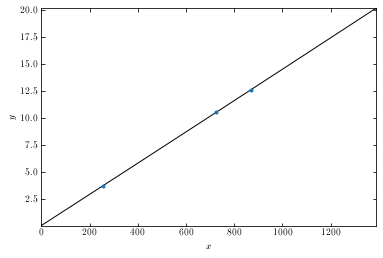

In [6]:
data.calibration.plot()

In [7]:
%%time
data.read(path + 'edfs/')

Reading XRF data
Done
CPU times: user 1.13 s, sys: 1.78 s, total: 2.91 s
Wall time: 2.91 s


In [20]:
data.save_h5(path + 'xrf.h5')

Saving: /home/zdenek/storage/dataXRDXRF/ElGreco_XRF/xrf.h5


In [7]:
%%time
data.load_h5(path + 'xrf.h5')
print(data.data.shape)

Loading: /home/zdenek/storage/dataXRDXRF/Giulia_XRF/xrf.h5
(418, 418, 2048)
CPU times: user 277 µs, sys: 992 ms, total: 992 ms
Wall time: 987 ms


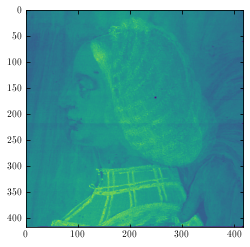

In [8]:
imshow(data.data.sum(-1)[::-1])

Text(0, 0.5, 'counts')

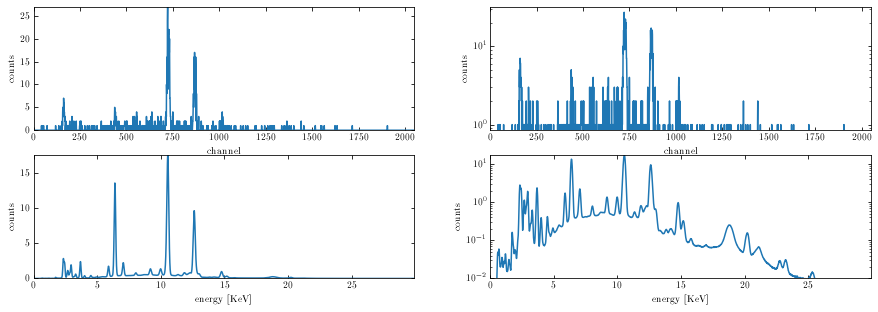

In [9]:
fig,ax = subplots(2,2,figsize=(15,5))

y = data.data[100,101]

ax[0,0].plot(y)
ax[0,0].set_xlim(0,2048)
ax[0,0].set_ylim(0,y.max())
ax[0,0].set_xlabel('channel')
ax[0,0].set_ylabel('counts')

ax[0,1].semilogy(y)
ax[0,1].set_xlim(0,2048)
ax[0,1].set_xlabel('channel')
ax[0,1].set_ylabel('counts')

y = data.data.mean(0).mean(0)
x = data.x

ax[1,0].plot(x,y)
ax[1,0].set_xlim(0,x.max())
ax[1,0].set_ylim(0,y.max())
ax[1,0].set_xlabel('energy [KeV]')
ax[1,0].set_ylabel('counts')

ax[1,1].semilogy(x,y)
ax[1,1].set_xlim(0,x.max())
ax[1,1].set_ylim(1e-2,y.max())
ax[1,1].set_xlabel('energy [KeV]')
ax[1,1].set_ylabel('counts')

In [13]:
%%time
c = data.resample()

CPU times: user 24.2 s, sys: 12.8 s, total: 37 s
Wall time: 3min 21s


In [14]:
new_data = array(c).reshape(data.data.shape[0],data.data.shape[1],-1)
new_data.shape

(418, 418, 1024)

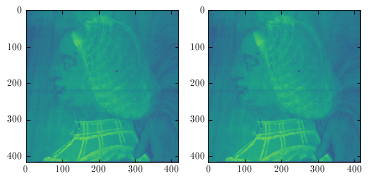

In [15]:
fig,ax = subplots(1,2)

ax[0].imshow(data.data.sum(-1)[::-1])
ax[1].imshow(new_data.sum(-1)[::-1])

In [16]:
x = data.x
y = data.data.mean(0).mean(0)

In [18]:
%%time
for i in range(100):
    ix,iy = resample(x,y,nbins=1024)

CPU times: user 1.69 s, sys: 0 ns, total: 1.69 s
Wall time: 1.69 s


14.609574054532203
14.609574054532203
14.609574054532205
14.609574054532212
CPU times: user 595 ms, sys: 4.76 ms, total: 600 ms
Wall time: 597 ms


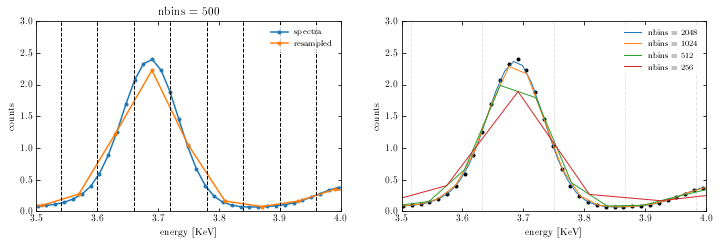

In [62]:
%%time
x = data.x
y = data.data.mean(0).mean(0)

ix,iy = resample(x,y,nbins=500)

fig,ax = subplots(1,2,figsize=(12,3.5))

ax[0].plot(x,y,'.-',label='spectra')
b = ix[1] - ix[0]
ax[0].plot(ix,iy / b,'.-',label='resampled')

ax[0].vlines((ix[1:] + ix[:-1]) * 0.5,0,3,'k',ls='--',lw=1)

ax[0].set_xlim(3.5,4)
ax[0].set_ylim(0,3)
ax[0].set_xlabel('energy [KeV]')
ax[0].set_ylabel('counts')
ax[0].set_title('nbins = 500')
ax[0].legend(frameon=True,facecolor='w',framealpha=0.8,edgecolor='w')

ax[1].plot(x,y,'k.')

for n in [2048,1024,512,256]:
    ix,iy = resample(x,y,n)
    b = ix[1] - ix[0]
    print(sum(iy))
    
    ax[1].plot(ix,iy / b,'-',lw=1,label=r'nbins = %s'%n)
    
ax[1].vlines((ix[1:] + ix[:-1]) * 0.5,0,3,'k',ls='--',lw=1,alpha=0.1)
    
#xlim(5.6,6.2)
ax[1].legend(frameon=True,facecolor='w',framealpha=0.8,edgecolor='w')
ax[1].set_xlim(3.5,4)
ax[1].set_ylim(0,3)
ax[1].set_xlabel('energy [KeV]')
ax[1].set_ylabel('counts')

savefig('doc/resampling.png')